# Import Statements

In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

# One Hot Encoding the Target Classes

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

# Creating 3 Important Lists --
1. data list for storing image data in numpy array form
2. paths list for storing paths of all images
3. result list for storing one hot encoded form of target class whether normal or tumor

In [3]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'./dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [4]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"./dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [5]:
data = np.array(data)
data.shape

(1222, 128, 128, 3)

In [6]:
result = np.array(result)
result = result.reshape(1222,2)

# Splitting the Data into Training & Testing

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Model Building

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [9]:
y_train.shape

(977, 2)

In [10]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/20
25/25 [==============================] - 51s 2s/step - loss: 4.9780 - val_loss: 47.4181
Epoch 2/20
25/25 [==============================] - 44s 2s/step - loss: 0.3902 - val_loss: 25.4554
Epoch 3/20
25/25 [==============================] - 45s 2s/step - loss: 0.4311 - val_loss: 14.1821
Epoch 4/20
25/25 [==============================] - 47s 2s/step - loss: 0.1780 - val_loss: 1.8433
Epoch 5/20
25/25 [==============================] - 55s 2s/step - loss: 0.1556 - val_loss: 0.6504
Epoch 6/20
25/25 [==============================] - 46s 2s/step - loss: 0.0640 - val_loss: 0.4652
Epoch 7/20
25/25 [==============================] - 50s 2s/step - loss: 0.1292 - val_loss: 0.6062
Epoch 8/20
25/25 [==============================] - 56s 2s/step - loss: 0.0596 - val_loss: 0.5353
Epoch 9/20
25/25 [==============================] - 63s 2s/step - loss: 0.0315 - val_loss: 0.5489
Epoch 10/20
25/25 [==============================] - 45s 2s/step - loss: 0.0221 - val_loss: 0.5532
Epoch 11/20
25/2

In [11]:
model.save("Brain_Tumor_Model-2.h5")

In [12]:
import json

# Save the training history to a JSON file
with open('history2.json', 'w') as history_file:
    json.dump(history.history, history_file)
    

In [13]:
import json

# Load the training history from the JSON file
with open('history2.json', 'r') as history_file:
    loaded_history = json.load(history_file)




In [14]:
# model.save('cnn_epochs50.h5')

In [15]:
from keras.models import load_model
model=load_model('Brain_Tumor_Model-2.h5')

# Plotting Losses

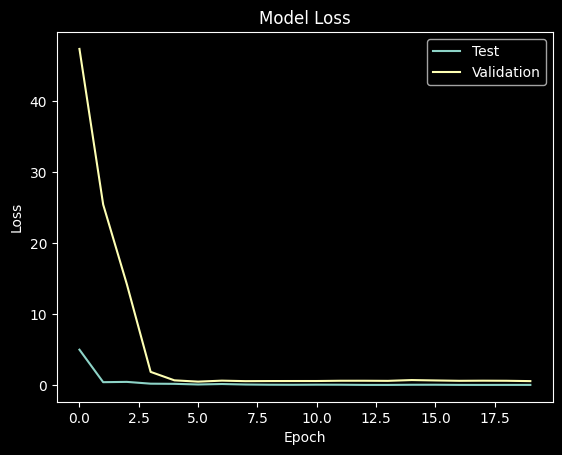

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# # Plot the saved history
# plt.plot(loaded_history['loss'])
# plt.plot(loaded_history['val_loss'])
# plt.title('Model Loss (Loaded)')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Test', 'Validation'], loc='upper right')
# plt.show()


# Just Checking the Model

In [17]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


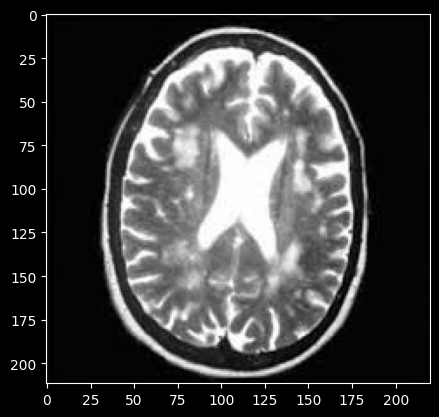

In [18]:
from matplotlib.pyplot import imshow
img = Image.open(r"./dataset/no/8.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Its a Tumor


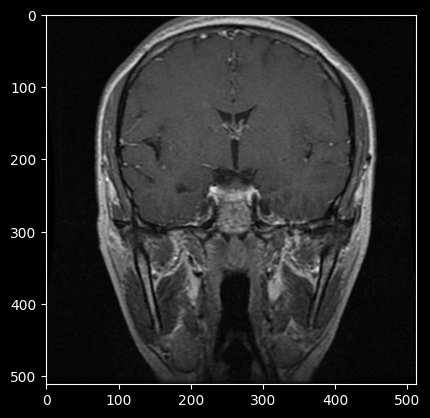

In [19]:
from matplotlib.pyplot import imshow
img = Image.open(r"./dataset/yes/p (43).jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

# Thats It !!